In [293]:
import pandas as pd
from datetime import timedelta

dtypes = {'id':'int64', 'item_nbr':'int32', 'store_nbr':'int8'}

train = pd.read_csv('train.csv', usecols=[1,2,3,4], dtype=dtypes, parse_dates=['date'],
                    skiprows=range(1, 101688779) #Skip dates before 2017-01-01
                    )

train.loc[(train.unit_sales<0),'unit_sales'] = 0 # eliminate negatives
# train['unit_sales'] =  train['unit_sales'].apply(pd.np.log1p) #logarithm conversion

# creating records for all items, in all markets on all dates
# for correct calculation of daily unit sales averages.
u_dates = train.date.unique()
u_stores = train.store_nbr.unique()
u_items = train.item_nbr.unique()
train.set_index(["date", "store_nbr", "item_nbr"], inplace=True)
train = train.reindex(
    pd.MultiIndex.from_product(
        (u_dates, u_stores, u_items),
        names=["date", "store_nbr", "item_nbr"]
    )
)

del u_dates, u_stores, u_items

train.loc[:, "unit_sales"].fillna(0, inplace=True)
train.reset_index(inplace=True) # reset index and restoring unique columns  
lastdate = train.iloc[train.shape[0]-1].date

In [369]:
import numpy as np
look_back = 7

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [370]:
print(train[(train["unit_sales"]>0)].reset_index(drop=True))

               date  store_nbr  item_nbr  unit_sales
0        2016-12-31         54   2048674         1.0
1        2017-01-01         25     99197         1.0
2        2017-01-01         25    103665         7.0
3        2017-01-01         25    105574         1.0
4        2017-01-01         25    105857         4.0
5        2017-01-01         25    106716         2.0
6        2017-01-01         25    108698         2.0
7        2017-01-01         25    108786         1.0
8        2017-01-01         25    108797         1.0
9        2017-01-01         25    108862         1.0
10       2017-01-01         25    108952         2.0
11       2017-01-01         25    114790         2.0
12       2017-01-01         25    114800         6.0
13       2017-01-01         25    115267         2.0
14       2017-01-01         25    115693         1.0
15       2017-01-01         25    115720         6.0
16       2017-01-01         25    115850         1.0
17       2017-01-01         25    115891      

In [371]:
t_129635 = train[(train["item_nbr"]==123347) & (train["store_nbr"]==1)]["unit_sales"].reset_index(drop=True)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
t_129635 = scaler.fit_transform(t_129635.values.reshape(-1,1))

In [372]:
train_size = int(len(t_129635) * 0.67)
test_size = len(t_129635) - train_size
train_comb, test_comb = t_129635[0:train_size,:], t_129635[train_size:len(t_129635),:]

In [373]:
train_input, train_output = create_dataset(train_comb, look_back)
test_input, test_output = create_dataset(test_comb, look_back)

In [374]:
trainX = np.reshape(train_input, (train_input.shape[0], 1, train_input.shape[1]))
trainY = train_output

testX = np.reshape(test_input, (test_input.shape[0], 1, test_input.shape[1]))
testY = test_output

In [375]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error


In [376]:
model = Sequential()
model.add(LSTM(1000,input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=300, batch_size=40, verbose=2)

Epoch 1/300
1s - loss: 0.0791
Epoch 2/300
0s - loss: 0.0496
Epoch 3/300
0s - loss: 0.0403
Epoch 4/300
0s - loss: 0.0438
Epoch 5/300
0s - loss: 0.0420
Epoch 6/300
0s - loss: 0.0387
Epoch 7/300
0s - loss: 0.0389
Epoch 8/300
0s - loss: 0.0389
Epoch 9/300
0s - loss: 0.0384
Epoch 10/300
0s - loss: 0.0376
Epoch 11/300
0s - loss: 0.0378
Epoch 12/300
0s - loss: 0.0376
Epoch 13/300
0s - loss: 0.0376
Epoch 14/300
0s - loss: 0.0371
Epoch 15/300
0s - loss: 0.0370
Epoch 16/300
0s - loss: 0.0369
Epoch 17/300
0s - loss: 0.0368
Epoch 18/300
0s - loss: 0.0372
Epoch 19/300
0s - loss: 0.0370
Epoch 20/300
0s - loss: 0.0367
Epoch 21/300
0s - loss: 0.0367
Epoch 22/300
0s - loss: 0.0367
Epoch 23/300
0s - loss: 0.0366
Epoch 24/300
0s - loss: 0.0368
Epoch 25/300
0s - loss: 0.0366
Epoch 26/300
0s - loss: 0.0365
Epoch 27/300
0s - loss: 0.0366
Epoch 28/300
0s - loss: 0.0366
Epoch 29/300
0s - loss: 0.0367
Epoch 30/300
0s - loss: 0.0366
Epoch 31/300
0s - loss: 0.0367
Epoch 32/300
0s - loss: 0.0366
Epoch 33/300
0s -

0s - loss: 0.0338
Epoch 265/300
0s - loss: 0.0337
Epoch 266/300
0s - loss: 0.0337
Epoch 267/300
0s - loss: 0.0334
Epoch 268/300
0s - loss: 0.0336
Epoch 269/300
0s - loss: 0.0342
Epoch 270/300
0s - loss: 0.0332
Epoch 271/300
0s - loss: 0.0336
Epoch 272/300
0s - loss: 0.0335
Epoch 273/300
0s - loss: 0.0336
Epoch 274/300
0s - loss: 0.0333
Epoch 275/300
0s - loss: 0.0339
Epoch 276/300
0s - loss: 0.0336
Epoch 277/300
0s - loss: 0.0334
Epoch 278/300
0s - loss: 0.0339
Epoch 279/300
0s - loss: 0.0339
Epoch 280/300
0s - loss: 0.0334
Epoch 281/300
0s - loss: 0.0336
Epoch 282/300
0s - loss: 0.0338
Epoch 283/300
0s - loss: 0.0338
Epoch 284/300
0s - loss: 0.0332
Epoch 285/300
0s - loss: 0.0333
Epoch 286/300
0s - loss: 0.0329
Epoch 287/300
0s - loss: 0.0338
Epoch 288/300
0s - loss: 0.0330
Epoch 289/300
0s - loss: 0.0334
Epoch 290/300
0s - loss: 0.0331
Epoch 291/300
0s - loss: 0.0335
Epoch 292/300
0s - loss: 0.0329
Epoch 293/300
0s - loss: 0.0328
Epoch 294/300
0s - loss: 0.0333
Epoch 295/300
0s - los

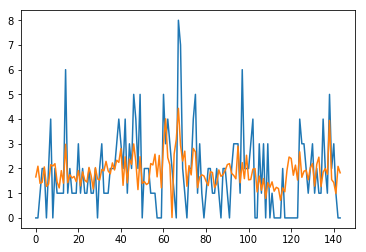

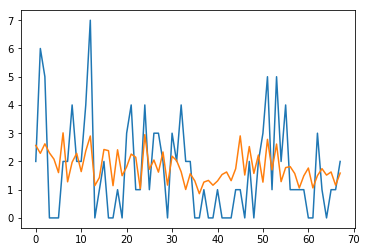

In [382]:
import matplotlib.pyplot as plt
import math

trainPredict = scaler.inverse_transform(model.predict(trainX))
testPredict = scaler.inverse_transform(model.predict(testX))
# calculate root mean squared error
#trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
#print('Train Score: %.2f RMSE' % (trainScore))

#trainPredictPlot = np.empty_like(lstm_input)
#trainPredictPlot[:, :] = np.nan
#trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

truth_train = scaler.inverse_transform(train_input[:,0].reshape(-1, 1))
truth_test = scaler.inverse_transform(test_input[:,0].reshape(-1, 1))

plt.plot(truth_train)
plt.plot(trainPredict)
plt.show()
plt.plot(truth_test)
plt.plot(testPredict)
plt.show()

In [385]:
from sklearn.metrics import mean_squared_error
trainScore = math.sqrt(mean_squared_error(truth_train, trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

mean = truth_train.copy()
mean.fill(truth_train.mean())
trainMean = math.sqrt(mean_squared_error(truth_train, mean[:,0]))
print('Mean: %.2f RMSE' % (trainMean))

testScore = math.sqrt(mean_squared_error(truth_test, testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

mean2 = truth_test.copy()
mean2.fill(truth_test.mean())
testMean = math.sqrt(mean_squared_error(truth_test, mean2[:,0]))
print('Mean: %.2f RMSE' % (testMean))


Train Score: 1.33 RMSE
Mean: 1.56 RMSE
Test Score: 1.44 RMSE
Mean: 1.67 RMSE
